# STEP 1: Importing the libraries and loading the dataset
##### We import the necessary libraries: pandas for data manipulation, numpy for numerical computations, matplotlib and seaborn for data visualization, wordcloud for creating word clouds, and LabelEncoder from sklearn for encoding categorical variables..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import squarify

##### We load the dataset from a CSV file using pd.read_csv() and store it in the superstore_data variable.

In [2]:
# Load the dataset
file_path = "Global-Superstore.csv"
superstore_data = pd.read_csv(file_path)


# STEP 2: Displaying the First row of the dataset
##### We display the first row of the dataset using head(1) to get a glimpse of the data.

In [3]:
# Display the first row of the dataset
print(superstore_data.head(1))

   Row ID        Order ID Order Date  Ship Date Ship Mode Customer ID  \
0   32298  CA-2012-124891  7/31/2012  7/31/2012  Same Day    RH-19495   

  Customer Name   Segment           City     State  ...       Product ID  \
0   Rick Hansen  Consumer  New York City  New York  ...  TEC-AC-10003033   

     Category Sub-Category                                       Product Name  \
0  Technology  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...   

     Sales Quantity Discount    Profit  Shipping Cost  Order Priority  
0  2309.65        7      0.0  762.1845         933.57        Critical  

[1 rows x 24 columns]


In [4]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


# STEP 3: Preprocessing
##### We check for missing values in the dataset using isnull().sum() and print the result.ta.

In [5]:
# Check for missing values
print(superstore_data.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


##### We drop rows with missing values using dropna(inplace=True) to ensure that our analysis is not affected by missing data.

In [6]:
# Drop rows with missing values
superstore_data.dropna(inplace=True)

##### We convert categorical variables (Category, Sub-Category, Segment, and Ship Mode) into numerical variables using LabelEncoder. This is necessary because many machine learning algorithms cannot handle categorical variables directly.

In [7]:
# Convert categorical variables into numerical variables
le = LabelEncoder()
superstore_data['Category'] = le.fit_transform(superstore_data['Category'])
superstore_data['Sub-Category'] = le.fit_transform(superstore_data['Sub-Category'])
superstore_data['Segment'] = le.fit_transform(superstore_data['Segment'])
superstore_data['Ship Mode'] = le.fit_transform(superstore_data['Ship Mode'])

##### We scale numerical variables (Sales and Profit) using MinMaxScaler to ensure that they are on the same scale. This is important because some algorithms are sensitive to the scale of the data.

In [8]:
# Scale numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
superstore_data[['Sales', 'Profit']] = scaler.fit_transform(superstore_data[['Sales', 'Profit']])

# STEP 4: Exploratory Data Analysis (EDA)

## WordCloud
##### We create a word cloud for the Product Name column using WordCloud. 
##### A word cloud is a visual representation of text data, where the size of each word is proportional to its frequency and we display the word cloud using matplotlib.

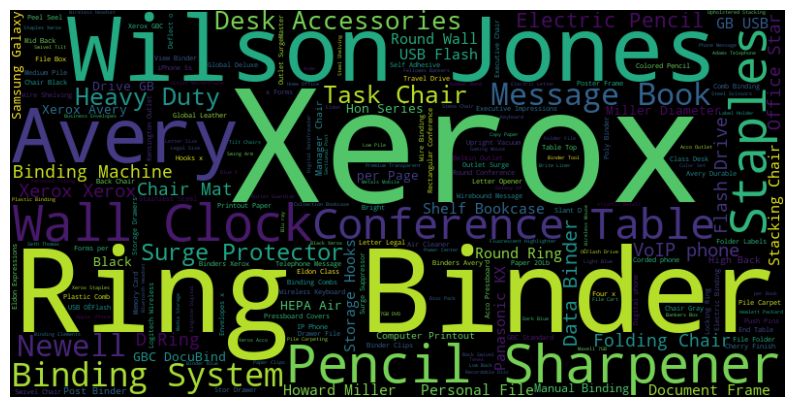

In [9]:
# Create a word cloud for the 'Product Name' column
wordcloud = WordCloud(width=800, height=400).generate(' '.join(superstore_data['Product Name']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Correlation Heatmap
##### We create a correlation matrix for the numerical variables (Sales, Profit, Quantity, and Discount) using corr().
#####  The heatmap shows the correlation between each pair of variables, with darker colors indicating stronger correlation and we display it using seaborn.

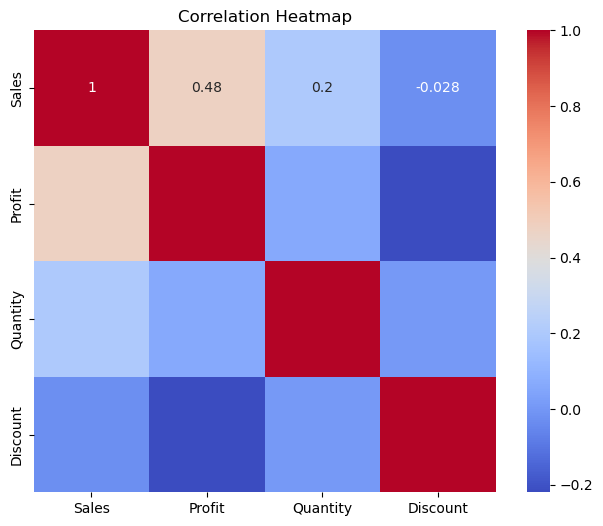

In [10]:
# Create a correlation heatmap for numerical variables
corr_matrix = superstore_data[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

# Display the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# STEP 5: Visualizations

## Bar Chart

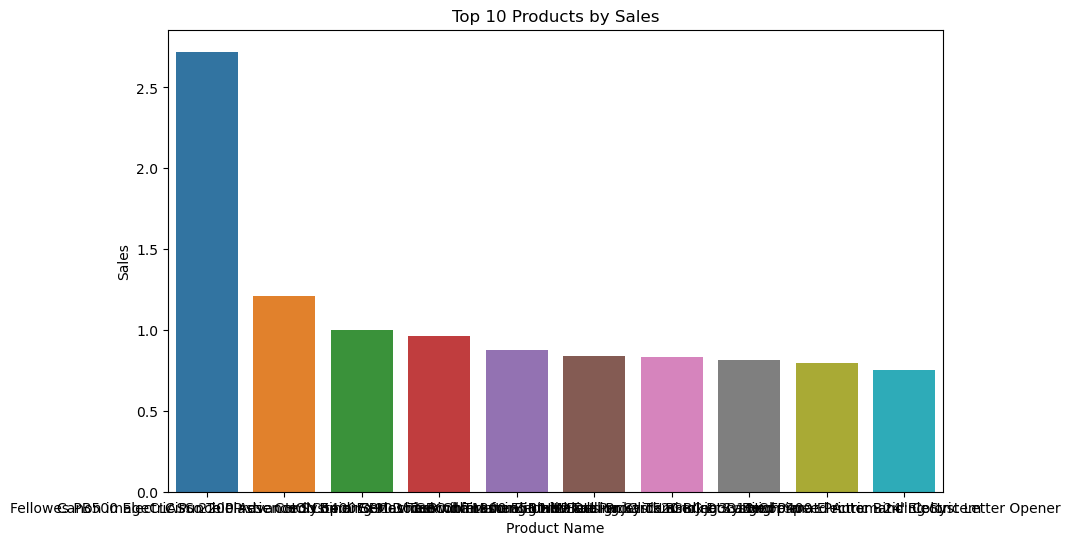

In [11]:
# Bar chart for top 10 products by sales
top_products = superstore_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()


## Histogram

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


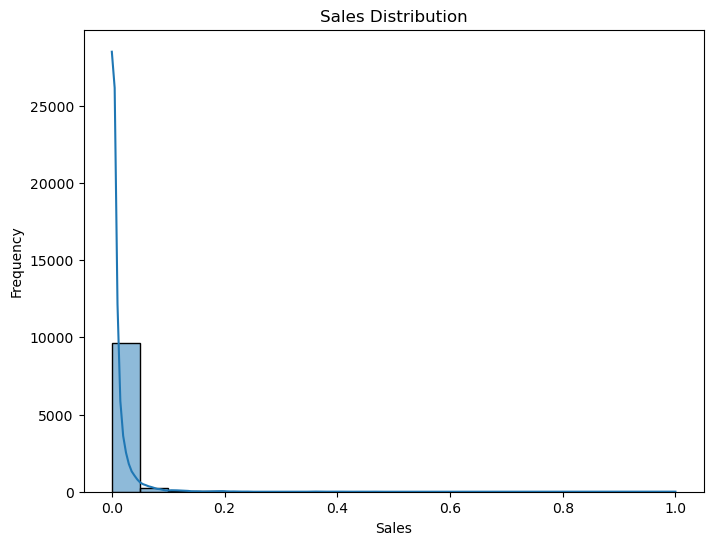

In [12]:
# Histogram for sales distribution
plt.figure(figsize=(8, 6))
sns.histplot(superstore_data['Sales'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## Scatter Plot

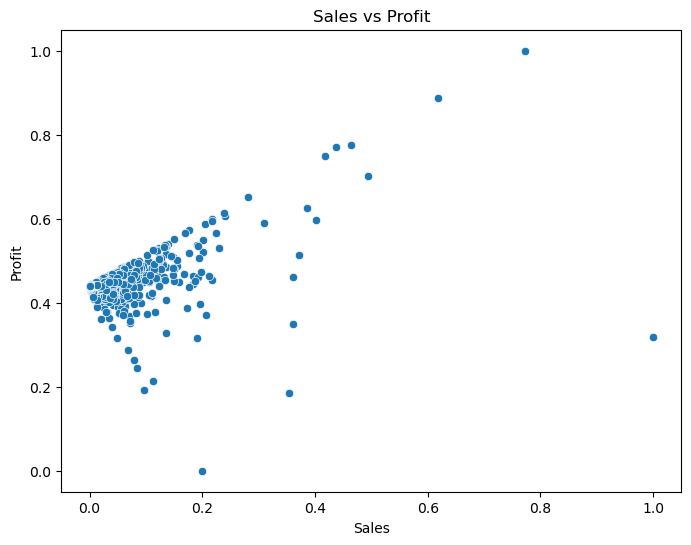

In [13]:
# Scatter plot for sales vs profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=superstore_data)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

## Box Plot

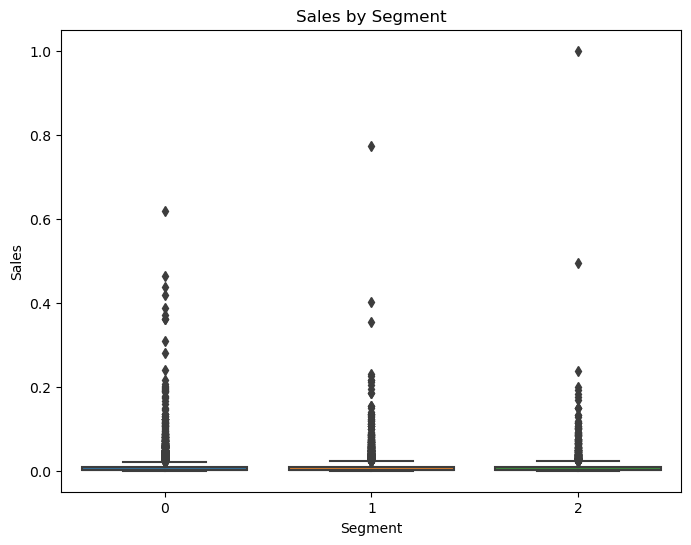

In [14]:
# Box plot for sales by segment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Sales', data=superstore_data)
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

## Treemap

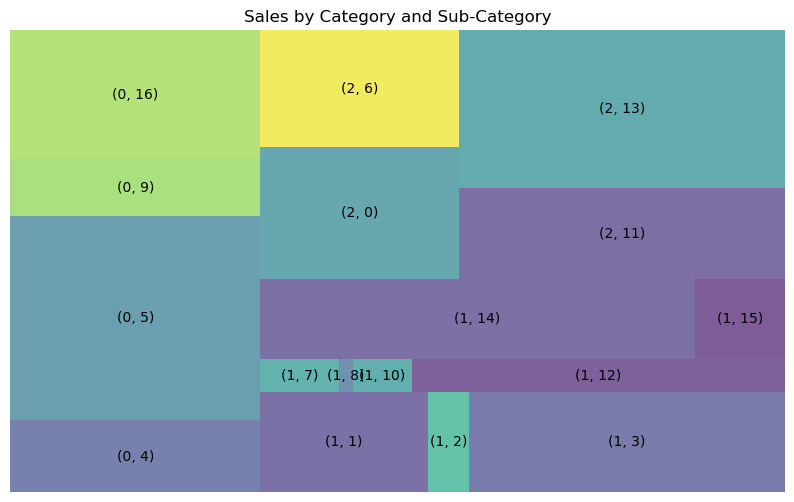

In [15]:
# Create a treemap for sales by category and sub-category
plt.figure(figsize=(10, 6))
squarify.plot(sizes=superstore_data.groupby(['Category', 'Sub-Category'])['Sales'].sum().values,
              label=superstore_data.groupby(['Category', 'Sub-Category'])['Sales'].sum().index,
              alpha=0.7)
plt.axis('off')
plt.title('Sales by Category and Sub-Category')
plt.show()